## Small words and large worlds

In [2]:
import seaborn as sns
import torch

import pyro
import pyro.distributions as dist

from rethinking import MAP, precis

**Code 2.1**

In [3]:
ways = torch.tensor([0., 3, 8, 9, 0])
ways / ways.sum()

tensor([0.0000, 0.1500, 0.4000, 0.4500, 0.0000])

**Code 2.2**

In [7]:
dist.Binomial(total_count=9, probs=0.5).log_prob(torch.tensor(6.)).exp()

tensor(0.1641)

**Code 2.3**

In [8]:
# define grid
p_grid = torch.linspace(start=0, end=1, steps=20)

# define prior
prior = torch.tensor(1.).repeat(20)

# compute likelihood at each value in grid
likelihood = dist.Binomial(total_count=9,
                           probs=p_grid).log_prob(torch.tensor(6.)).exp()

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()

**Code 2.4**

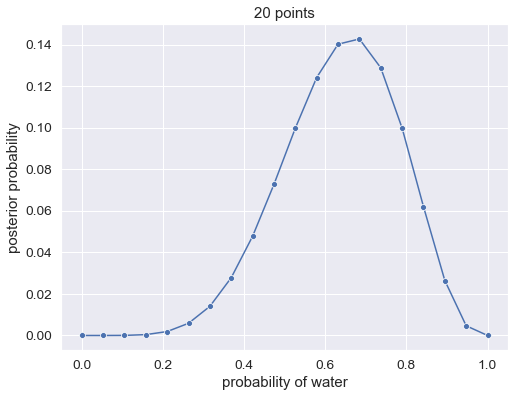

In [9]:
ax = sns.lineplot(p_grid, posterior, marker="o")
ax.set(xlabel="probability of water", ylabel="posterior probability",
       title="20 points");

**Code 2.5**

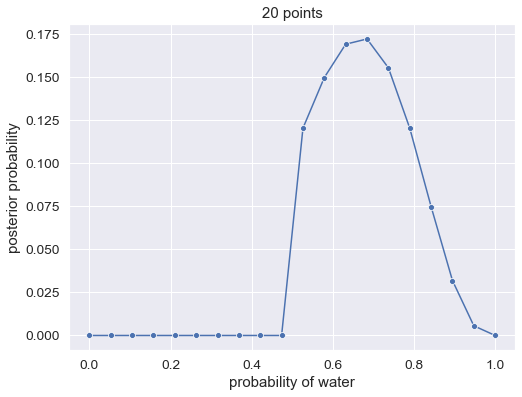

In [13]:
# First prior...
prior = torch.where(p_grid < 0.5, torch.tensor(0.), torch.tensor(1.))


# compute likelihood at each value in grid
likelihood = dist.Binomial(total_count=9,
                           probs=p_grid).log_prob(torch.tensor(6.)).exp()

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()

ax = sns.lineplot(p_grid, posterior, marker="o")
ax.set(xlabel="probability of water", ylabel="posterior probability",
       title="20 points");

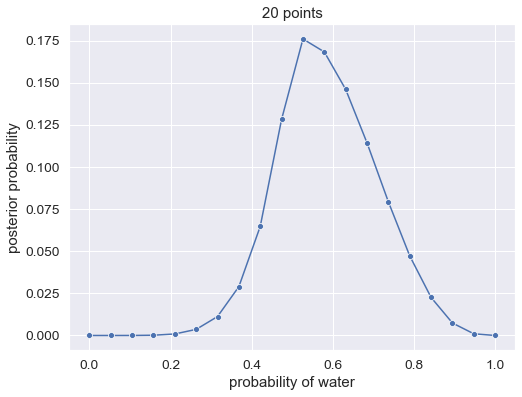

In [14]:
prior = (-5 * (p_grid - 0.5).abs()).exp()

# compute likelihood at each value in grid
likelihood = dist.Binomial(total_count=9,
                           probs=p_grid).log_prob(torch.tensor(6.)).exp()

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()

ax = sns.lineplot(p_grid, posterior, marker="o")
ax.set(xlabel="probability of water", ylabel="posterior probability",
       title="20 points");

**Code 2.6**: Quadratic approximation

In [15]:
def model(w):
    p = pyro.sample("p", dist.Uniform(0, 1))  # uniform prior
    pyro.sample("w", dist.Binomial(9, p), obs=w)  # binomial likelihood

globe_qa = MAP(model).run(torch.tensor(6.))

# display summary of quadratic approximation
precis(globe_qa)

,Mean,StdDev,|0.89,0.89|
p,0.65,0.14,0.44,0.87


**Code 2.7**

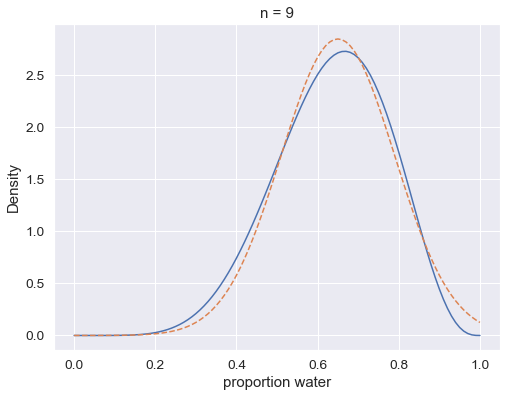

In [16]:
# analytical calculation
w = 6
n = 9
x = torch.linspace(0, 1, 101)
ax = sns.lineplot(x, dist.Beta(w + 1, n - w + 1).log_prob(x).exp())
ax.set(xlabel="proportion water", ylabel="Density", title="n = 9")
# quadratic approximation
precis_df = precis(globe_qa)
sns.lineplot(x, dist.Normal(precis_df["Mean"][0],
                            precis_df["StdDev"][0]).log_prob(x).exp())
ax.lines[1].set_linestyle("--")